In [100]:
import helpers
from helpers import Loader

import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from collections import Counter
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [101]:
loader = Loader()

In [102]:
X_trn, Y_trn = loader.load("trn_set", ignore_categorical=True)
X_dev, Y_dev = loader.load("dev_set", ignore_categorical=True)

#### Train

In [103]:
gbm = GradientBoostingClassifier(random_state=0)
gbm.fit(X_trn, Y_trn)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

#### Evaluate

Text(0,0.5,'Feature Importance Score')

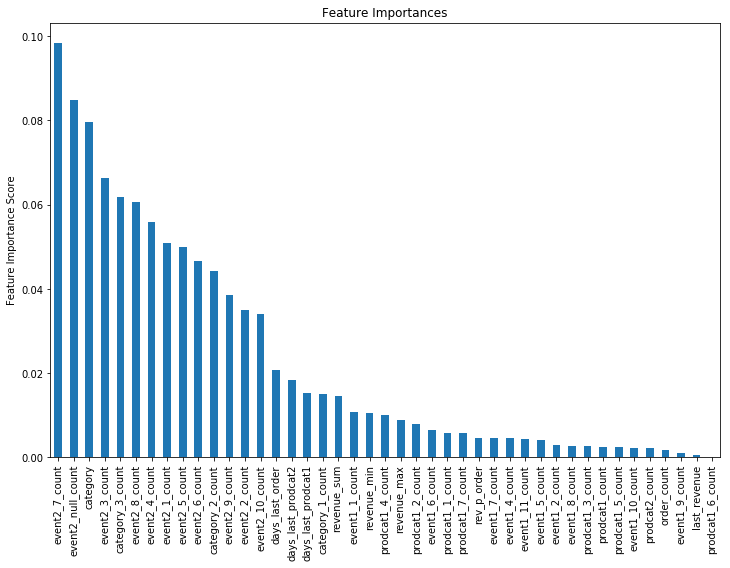

In [104]:
plt.figure(figsize=(12, 8))
feat_imp = pd.Series(gbm.feature_importances_, X_trn.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [105]:
Y_dev.value_counts() / len(Y_dev)

7     0.375114
3     0.139659
8     0.119354
4     0.101835
1     0.100846
9     0.058441
5     0.051022
6     0.031446
2     0.014213
10    0.008070
Name: event2, dtype: float64

In [106]:
Y_pred = gbm.predict(X_dev)

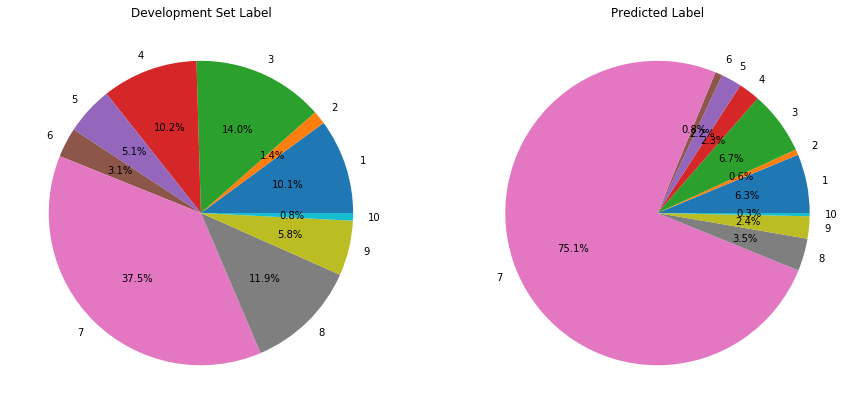

In [107]:
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(1, 2, 1)

value_counts = Counter(Y_dev)
_ = ax1.pie(x = list(value_counts.values()), 
            labels = list(value_counts.keys()),
            autopct='%1.1f%%', 
            labeldistance = 1.1)
ax1.set_title('Development Set Label')

ax2 = plt.subplot(1, 2, 2)

value_counts = Counter(Y_pred)
_ = ax2.pie(x = list(value_counts.values()), 
            labels = list(value_counts.keys()),
            autopct='%1.1f%%',
            labeldistance = 1.1)

ax2.set_title('Predicted Label')

plt.show()

In [108]:
print("Accuracy : %.4g" % metrics.accuracy_score(Y_dev.values, Y_pred))

Accuracy : 0.4354


In [109]:
df_m = pd.DataFrame(confusion_matrix(Y_dev, Y_pred), columns=["predicted_%i"%(i + 1) for i in range(10)])

In [110]:
df_m.index = df_m.index.map(lambda x : "true_" + str(x + 1))

df_m

,predicted_1,predicted_2,predicted_3,predicted_4,predicted_5,predicted_6,predicted_7,predicted_8,predicted_9,predicted_10
true_1,1060,21,139,83,112,18,2338,64,33,6
true_2,94,87,14,12,21,1,302,9,5,1
true_3,166,16,1000,68,63,26,3825,138,53,10
true_4,183,10,252,339,52,18,2913,98,40,7
true_5,160,11,108,12,320,24,1247,49,19,10
true_6,68,9,103,18,38,128,797,40,5,2
true_7,457,39,543,146,165,47,12578,322,90,23
true_8,144,24,316,111,48,18,3358,523,40,3
true_9,55,8,102,76,23,10,1268,81,622,0
true_10,17,2,6,2,0,0,211,3,1,68


In [116]:
np.diag(np.matrix(df_m.values))

array([ 1060,    87,  1000,   339,   320,   128, 12578,   523,   622,
          68])

In [117]:
# recall
np.diag(np.matrix(df_m.values)) / df_m.sum(axis=1)

true_1     0.273619
true_2     0.159341
true_3     0.186393
true_4     0.086656
true_5     0.163265
true_6     0.105960
true_7     0.872866
true_8     0.114068
true_9     0.277060
true_10    0.219355
dtype: float64

In [118]:
# precision
np.diag(np.matrix(df_m.values)) / df_m.sum(axis=0)

predicted_1     0.440932
predicted_2     0.383260
predicted_3     0.387147
predicted_4     0.391003
predicted_5     0.380048
predicted_6     0.441379
predicted_7     0.436176
predicted_8     0.394122
predicted_9     0.685022
predicted_10    0.523077
dtype: float64

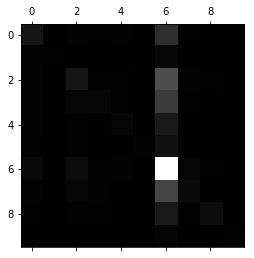

In [113]:
plt.matshow(confusion_matrix(Y_dev, Y_pred), cmap=plt.cm.gray)
plt.savefig("figs/confusion_heatmap.png")